In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib.colors as colors
import datetime

In [19]:
def add_z_bin(df_in, z_bin_size = 1):
    """
    A function to sort data into depth bins. Does no averaging, just makes a column in a 
    pandas dataframe that identifies the bin for each record
    df_in: pandas dataframe, must include a column 'depth'
    z_bin_size: size of desired depth bins
    Returns: the dataframe supplied, with the added column 'depth_bin' and an np array of bin centers
    """
    z_centers = np.arange(-np.round(np.nanmax(df_in.depth),0)+z_bin_size/2, 0, z_bin_size)
    bin_ids = []
    for depth in df_in.depth:
        bin_ids.append(np.abs(z_centers+depth).argmin())
   
    df_in['depth_bin']= bin_ids
    return (df_in, z_centers)

def savefig(figname, extension="png"):
    plt.savefig(
        str(figname + "." + extension),
        format=extension,
        dpi="figure",
        bbox_inches="tight",
    )

# For consistent plot labels

labels = dict(temp='Conservative temperature ($\mathrm{^{\circ}C}$)',
              sal='Absolute salinity ($\mathrm{g\ kg^{-1}}$)',
              pre='Pressure (dbar)',
              vel='Geostrophic velocity ($\mathrm{cm\ s^{-1}}$)',
              den='in situ density ($\mathrm{kg\ m^{-3}}$)',
              pden='Potential density ($\mathrm{kg\ m^{-3}}$)',
              depth='Depth (m)')    

# "better" plotting defaults, this is a matter of taste!
plt.rcParams.update({'font.size': 20})
SMALL_SIZE = 18
MED_SIZE = 18
LARGE_SIZE = 26
plt.rc('font', size=MED_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('axes', titlesize=MED_SIZE)
plt.rc('legend', fontsize=MED_SIZE)
plt.rcParams['contour.negative_linestyle'] = 'solid'

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Load in the file of processed glider data and list the variables

In [3]:
glider_df = pd.read_csv('glider_processed.csv', index_col=0, parse_dates=['glider_time'])
glider_df.index = glider_df.glider_time
list(glider_df)

['DAC_u',
 'DAC_v',
 'abs_salinity',
 'conductivity',
 'cons_temp',
 'depth',
 'direction',
 'dive',
 'dive_num',
 'lat',
 'lon',
 'pressure',
 'profile',
 'profile_num',
 'rho',
 'salinity',
 'salinity_nocorr',
 'sigma0',
 'temp',
 'roll',
 'pitch',
 'heading',
 'w_H2O',
 'glider_time',
 'glider',
 'dive_limb_ident',
 'sound_speed',
 'x',
 'y']

In [4]:
glider_df, z_bins = add_z_bin(glider_df)

For the purpose of this plot, we will just use data from sg637 as it has the longest time series (see figure "platforms on site" for a timeline of glider operations)

In [5]:
sg637_df = glider_df.loc[glider_df['glider']=='sg637']

In [6]:
sg637_df.head()

,DAC_u,DAC_v,abs_salinity,conductivity,cons_temp,depth,direction,dive,dive_num,lat,...,pitch,heading,w_H2O,glider_time,glider,dive_limb_ident,sound_speed,x,y,depth_bin
glider_time,,,,,,,,,,,,,,,,,,,,,
2020-01-23 14:35:40.870005,-0.104135,0.083383,35.601190,55.756318,26.966234,1.340919,-1.0,1.0,1.0,14.183558,...,-50.6,97.6,-0.001678,2020-01-23 14:35:40.870005,sg637,2001.0,1539.331273,-379.40186,172.428025,987
2020-01-23 14:35:46.834999,-0.104135,0.083383,35.604030,55.765614,26.971343,1.350925,-1.0,1.0,1.0,14.183558,...,-55.2,128.8,-0.005775,2020-01-23 14:35:46.834999,sg637,2001.0,1539.346427,-379.40186,172.428025,987
2020-01-23 14:35:54.732995,-0.104135,0.083383,35.607390,55.760912,26.962259,1.420973,-1.0,1.0,1.0,14.183558,...,-60.7,117.6,-0.014122,2020-01-23 14:35:54.732995,sg637,2001.0,1539.331433,-379.40186,172.428025,987
2020-01-23 14:36:01.007001,-0.104135,0.083383,35.602403,55.760836,26.968749,1.551062,-1.0,1.0,1.0,14.183558,...,-64.2,128.3,-0.003273,2020-01-23 14:36:01.007001,sg637,2001.0,1539.342149,-379.40186,172.428025,987
2020-01-23 14:36:06.963999,-0.104135,0.083383,35.613668,55.774466,26.966538,1.461000,-1.0,1.0,1.0,14.183558,...,-66.4,120.9,0.004194,2020-01-23 14:36:06.963999,sg637,2001.0,1539.349508,-379.40186,172.428025,987


Find the mean time of each dive in datetime and yeardays

In [7]:
df_dive_av = sg637_df.groupby('dive_num', as_index=False).median()
mean_time, mean_time_yd = [], []
for dive in df_dive_av.dive_limb_ident:
    df = glider_df[glider_df.dive_limb_ident==dive]
    mean_time_dive = (df.glider_time - df.glider_time.min()).mean() + df.glider_time.min()
    mean_time.append(mean_time_dive)
    mean_time_yd.append(mean_time_dive.timetuple().tm_yday
                        + mean_time_dive.timetuple().tm_hour/24
                        + mean_time_dive.timetuple().tm_min/(24*60))
df_dive_av['glider_time'] = mean_time
df_dive_av['yearday'] = mean_time_yd

In [8]:
df_dive_av

,dive_num,DAC_u,DAC_v,abs_salinity,conductivity,cons_temp,depth,direction,dive,lat,...,pitch,heading,w_H2O,dive_limb_ident,sound_speed,x,y,depth_bin,glider_time,yearday
0,1.0,-0.104135,0.083383,35.817514,56.217595,27.085652,35.341277,1.0,1.0,14.183565,...,9.00,135.30,0.022914,2001.5,1540.471546,-372.437799,173.200478,953.0,2020-01-23 14:48:52.893044644,23.616667
1,2.0,-0.047032,0.067207,35.961456,56.598298,27.016426,53.729937,-1.0,2.0,14.184373,...,-2.60,130.30,0.018768,2002.0,1540.833568,-525.292988,262.561183,935.0,2020-01-23 15:19:14.116685874,23.638194
2,3.0,-0.000253,0.063603,36.886991,53.634786,22.650849,139.468561,-1.0,3.0,14.184512,...,-14.70,135.90,0.013069,2003.0,1533.696128,-438.878163,277.925825,849.0,2020-01-23 16:34:51.287326309,23.690278
3,4.0,0.013958,0.066003,36.874087,54.123829,23.010337,136.028519,-1.0,4.0,14.181997,...,-14.60,143.70,0.013773,2004.0,1534.639608,19.353315,-0.284094,852.0,2020-01-23 18:08:18.020647789,23.755556
4,5.0,-0.059541,0.060442,35.684000,42.274217,13.514929,286.896649,-1.0,5.0,14.190087,...,-14.10,316.90,0.005751,2005.0,1507.522032,-781.412314,894.811515,702.0,2020-01-23 20:11:20.600294239,23.840972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,151.0,-0.065886,0.080523,35.720142,55.587887,26.617734,58.406883,1.0,151.0,14.181740,...,21.50,149.70,0.020569,2151.5,1539.295434,-142.041473,-28.736341,930.0,2020-02-16 11:45:35.161260366,47.489583
151,152.0,-0.064101,0.089700,35.719366,55.577947,26.616367,57.311440,1.0,152.0,14.180957,...,22.20,144.10,0.028312,2152.5,1539.256988,-115.640908,-115.418165,931.0,2020-02-16 12:18:59.811715060,47.512500
152,153.0,-0.062402,0.106789,35.715381,55.571313,26.610760,57.606559,1.0,153.0,14.181162,...,25.00,112.85,0.033521,2153.5,1539.290942,6.979159,-92.767629,931.0,2020-02-16 12:51:26.065721315,47.535417
153,154.0,-0.148258,0.086195,35.720499,55.585769,26.616406,56.180964,1.0,154.0,14.183366,...,25.25,36.85,0.034908,2154.5,1539.294548,-16.973847,151.120016,932.5,2020-02-16 13:22:23.005639886,47.556944


Find the unique dive numbers

In [9]:
dive_nums = np.unique(sg637_df.dive_num.values)
print(dive_nums)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155.]


Select a subset of dives to plot. Make the colourmap that will colour the curves to a colourmap normalised by yearday. I use the first 90% of viridis here. This is convoluted and hacky but it works

In [10]:
dives_to_plot = dive_nums[90:110:4]
print(f'dives to plot: {dives_to_plot}')

cm_start, cm_end = 0.0, 0.9

yd_subset = df_dive_av.loc[df_dive_av['dive_num'].isin(dives_to_plot), 'yearday'].values
cm_subsection = (yd_subset - yd_subset[0]) / (yd_subset[-1]-yd_subset[0]) * (cm_end - cm_start)

vir_col = [cm.viridis(x) for x in cm_subsection]

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=1000):
    new_cmap = colors.LinearSegmentedColormap.from_list(
          'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
           cmap(np.linspace(minval, maxval, n)))
    return new_cmap    
cmap = plt.get_cmap('viridis')
new_cmap = truncate_colormap(cmap, cm_start, cm_end)

dives to plot: [ 91.  95.  99. 103. 107.]


In [12]:
list(df_av)

['depth_bin',
 'DAC_u',
 'DAC_v',
 'abs_salinity',
 'conductivity',
 'cons_temp',
 'depth',
 'direction',
 'dive',
 'dive_num',
 'lat',
 'lon',
 'pressure',
 'profile',
 'profile_num',
 'rho',
 'salinity',
 'salinity_nocorr',
 'sigma0',
 'temp',
 'roll',
 'pitch',
 'heading',
 'w_H2O',
 'dive_limb_ident',
 'sound_speed',
 'x',
 'y']

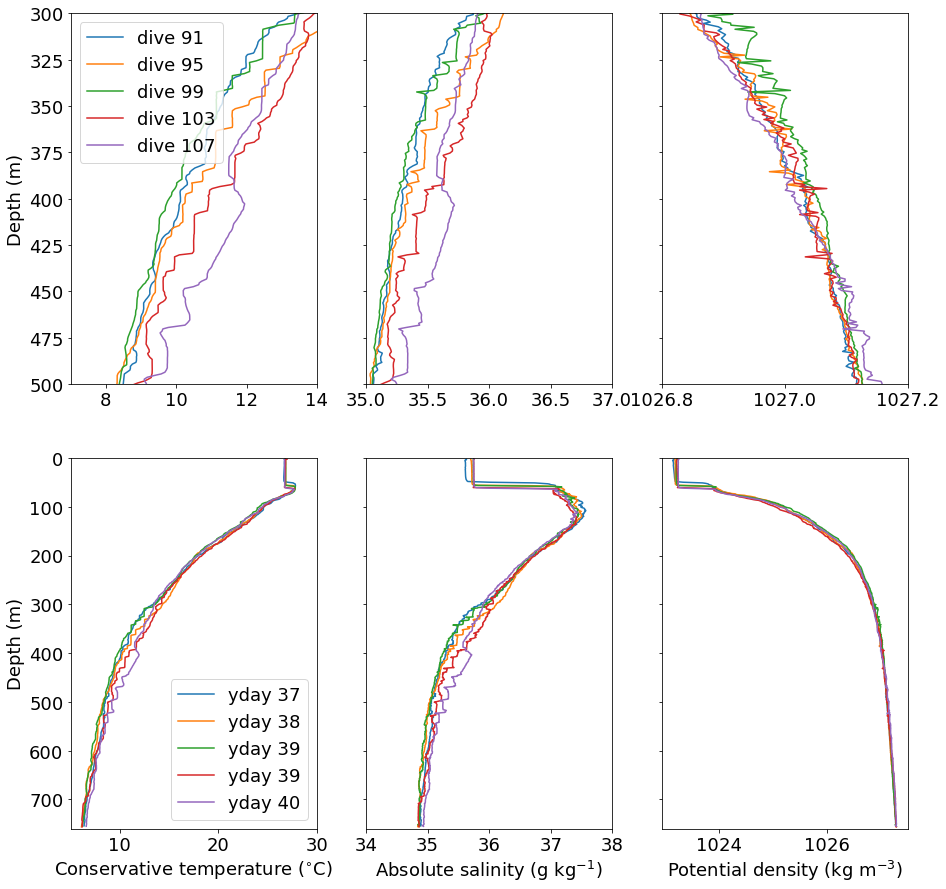

In [25]:
fig, ax = plt.subplots(2,3, figsize=(15,15), sharey='row')
ax = ax.ravel()



#Loop through the selected dive limbs
for ident, dive_num in enumerate(dives_to_plot):
    df = sg637_df.loc[sg637_df['dive_limb_ident']==dive_num+2000] # 2000 for descent limb, 2000.5 for ascent limb. Descent limb generally better on sg637 due to glide angle
    # optional lines to filter out shallow values
    # df.loc[df['depth']<0, 'cons_temp'] = np.nan
    # df.loc[df['depth']<0, 'abs_salinity'] = np.nan
    # Average into depth bins, using the median here
    df_av = df.groupby('depth_bin', as_index=False).median()
    ax[0].plot(df_av.cons_temp, df_av.depth, label=f'dive {str(int(dive_num))}')
    ax[1].plot(df_av.abs_salinity, df_av.depth)
    ax[2].plot(df_av.sigma0, df_av.depth)
    ax[3].plot(df_av.cons_temp, df_av.depth, label=f'yday {int(yd_subset[ident])}')
    ax[4].plot(df_av.abs_salinity, df_av.depth)
    ax[5].plot(df_av.sigma0, df_av.depth)


ax[0].set(ylim=[300,500], xlim=[7,14], ylabel=labels['depth'])
ax[1].set(xlim=[35, 37])
ax[2].set(xlim=[1026.8, 1027.2])
ax[3].set(ylim=[0, 760], xlim=[5,30], xlabel=labels['temp'], ylabel=labels['depth'])
ax[4].set(xlim=[34, 38], xlabel=labels['sal'])
ax[5].set(xlabel=labels['pden'])
# invert y axis, it is the ocean after all
ax[0].invert_yaxis() 
ax[3].invert_yaxis() 
ax[0].legend()
ax[3].legend()
#savefig('temp_sal_pden_transition')

Generate the plots of salinity and and temperature

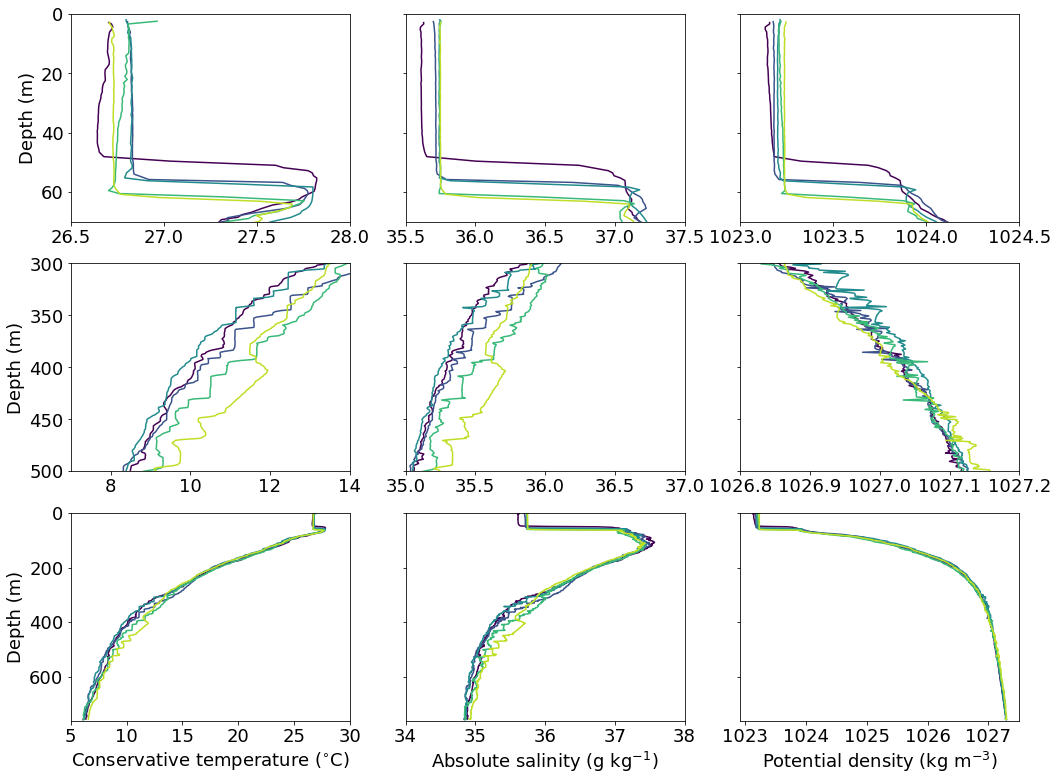

In [39]:
fig, ax = plt.subplots(3,3, figsize=(17,13), sharey='row')
ax = ax.ravel()



#Loop throuhg the selected dive limbs
for ident, dive_num in enumerate(dives_to_plot):
    df = sg637_df.loc[sg637_df['dive_limb_ident']==dive_num+2000] # 2000 for descent limb, 2000.5 for ascent limb. Descent limb generally better on sg637 due to glide angle
    # optional lines to filter out shallow values
    # df.loc[df['depth']<0, 'cons_temp'] = np.nan
    # df.loc[df['depth']<0, 'abs_salinity'] = np.nan
    # Average into depth bins, using the median here
    df_av = df.groupby('depth_bin', as_index=False).median()
    ax[0].plot(df_av.cons_temp, df_av.depth, color=vir_col[ident])
    ax[1].plot(df_av.abs_salinity, df_av.depth, color=vir_col[ident])
    ax[2].plot(df_av.sigma0, df_av.depth, color=vir_col[ident])
    ax[3].plot(df_av.cons_temp, df_av.depth, color=vir_col[ident])
    ax[4].plot(df_av.abs_salinity, df_av.depth, color=vir_col[ident])
    ax[5].plot(df_av.sigma0, df_av.depth, color=vir_col[ident])
    ax[6].plot(df_av.cons_temp, df_av.depth, color=vir_col[ident])
    ax[7].plot(df_av.abs_salinity, df_av.depth, color=vir_col[ident])
    ax[8].plot(df_av.sigma0, df_av.depth, color=vir_col[ident])
    
ax[0].set(ylim=[0,70], xlim=[26.5,28], ylabel=labels['depth'])
ax[1].set(xlim=[35.5, 37.5])
ax[2].set(xlim=[1023, 1024.5])
ax[3].set(ylim=[300,500], xlim=[7,14], ylabel=labels['depth'])
ax[4].set(xlim=[35, 37])
ax[5].set(xlim=[1026.8, 1027.2])

ax[6].set(ylim=[0, 760], xlim=[5,30], xlabel=labels['temp'], ylabel=labels['depth'])
ax[7].set(xlim=[34, 38], xlabel=labels['sal'])
ax[8].set(xlabel=labels['pden'])
# invert y axis, it is the ocean after all
ax[0].invert_yaxis() 
ax[3].invert_yaxis() 
ax[6].invert_yaxis() 
savefig('temp_sat_den_curves')

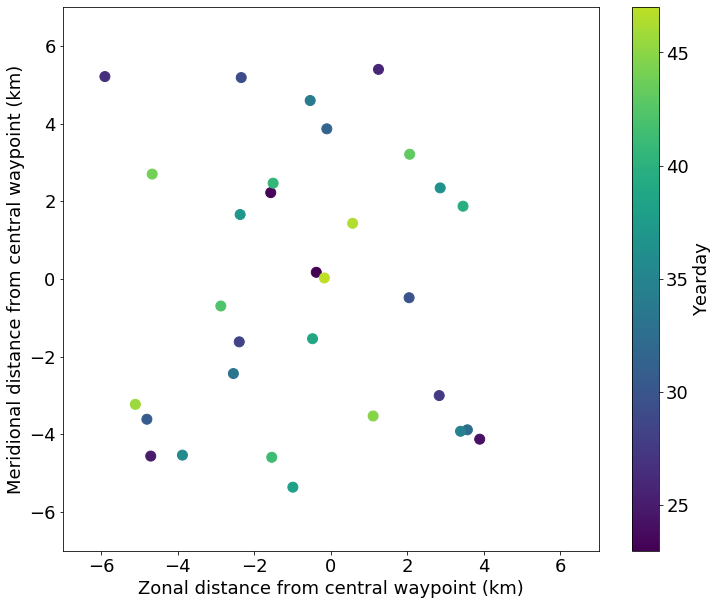

In [14]:
fig, ax = plt.subplots(figsize=[12,10])
x_locs, y_locs = [], []
# Loop through the dives to plot, averaging the distance in meters from the center of the sampling area
for ident, dive_num in enumerate(dives_to_plot):
    df = sg637_df.loc[sg637_df['dive_limb_ident']==dive_num+2000]
    x_locs.append(np.nanmean(df.x/1000))
    y_locs.append(np.nanmean(df.y/1000))
# Plot and scatter the points using the same truncated colormap as the tempsal plots
#mappable0 = ax.plot(x_locs, y_locs, color='k')
mappable1 = ax.scatter(x_locs, y_locs, c = vir_col, s=100)

# A dummy plot using the actual yeardays so they will be added to the colourbar
mappable2 = ax.scatter([100, 100], [100, 100],c = [sg637_df.glider_time[0].timetuple().tm_yday, sg637_df.glider_time[-1].timetuple().tm_yday], cmap=new_cmap)
fig.colorbar(mappable=mappable2,ax=ax,orientation='vertical',label=r'Yearday')
ax.set(xlim=[-7, 7], ylim=[-7, 7], xlabel='Zonal distance from central waypoint (km)', ylabel='Meridional distance from central waypoint (km)')
savefig('subset_dive_locations')